In [1]:
# else function in for loop

def find(seq, target):
    """
    This to demonstrate the 'else' function in a for loop. 
    Using 'else' in for loop to do an action if there was
    no break found in the loop.

    """
    for i, value in enumerate(seq):
        if value == target:
            break
    else:
        return -1

    return i

# DICTIONARY AND DEFAULTDICT

In [3]:
# LOOPING OVER DICTIONARY KEYS AND DELETE KEYS WITH CRITERIA

d = {'a': 1, 'a3': 3, 'b': 4, 'r4':5}
# instead of looping over each keys and delete items
d = {k: d[k] for k in d if not k.startswith('r')}

d

{'a': 1, 'a3': 3, 'b': 4}

In [5]:
# COUNTING WITH DICTIONARY

from collections import defaultdict
colors = ['red', 'green', 'blue', 'blue', 'red', 'red']
d = {}

# First method
for color in colors:
    d[color] = d.get(color, 0) + 1

# Using default dict:
d = defaultdict(int)

for color in colors:
    d[color] += 1  # If color is not exists yet,
    
d

defaultdict(int, {'red': 3, 'green': 1, 'blue': 2})

In [ ]:
# GROUPING WITH DICTIONARY
colors = ['red', 'green', 'blue', 'blue', 'red', 'red']
d = defaultdict(list)
for color in colors:
    key = len(color)
    d[key].append(color)

In [6]:
# DICTIONARY POPITEM

# returns an arbitrary element (key, value) pair from the dictionary
# removes an arbitrary element (the same element which is returned) from the dictionary.

person = {'name': 'Phill', 'age': 22, 'salary': 3500.0}

result = person.popitem()
print('person = ', person)
print('Return Value = ', result)

person =  {'name': 'Phill', 'age': 22}
Return Value =  ('salary', 3500.0)


## DATE & TIME

In [ ]:
# CONVERT TIMESTAMP FROM UTC TO OTHER TIMEZONE 

def convert_time_from_utc(timestamp, to_time_zone='Australia/Melbourne', output_format=None):
    """
    Convert utc timestamp to other timestamp

    Args:
        timestamp: datetime object or string present datetime.
                    if the input is string it must follow 'YYYY-MM-DD HH:MM:SS'

        to_time_zone: to the desire timezone
        output_format: 'datetime' or string format of time
                    If set as None, then function return exactly the same type as input.

    Returns:
        datetime object or string presenting datetime in new time zone
    """

    if output_format is None:
        if type(timestamp) is str:
            output_format = 'str'
            timestamp = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
        elif (type(timestamp) is datetime) or (type(timestamp) is datetime.datetime):
            output_format = 'datetime'
        else:
            raise ValueError(
                'input timestamp must either string YYYY-MM-DD HH:MM:SS or a datetime object')

    utc_tz = tz.gettz('UTC')
    to_tz = tz.gettz(to_time_zone)

    output = timestamp.replace(tzinfo=utc_tz)
    output = output.astimezone(to_tz)

    if output_format == 'datetime':
        return output
    elif output_format == 'str':
        return datetime.strftime(output, '%Y-%m-%d %H:%M:%S')
    else:
        return datetime.strftime(output, output_format)

### Timestamp

In [7]:
# EPOCH: timestamp from 1/1/1970
import time

time.time()

1565014626.918981

In [10]:
from datetime import datetime
dtnow = datetime.fromtimestamp(time.time())
dtnow

datetime.datetime(2019, 8, 6, 0, 18, 18, 455068)

In [13]:
dtnow.year, dtnow.month, dtnow.hour

(2019, 8, 0)

### UTC

In [15]:
# GET TODAY DATE IN UTC TIME ZONE
from datetime import datetime, timezone, timedelta

datetime.now(timezone.utc)

datetime.datetime(2019, 8, 5, 14, 19, 53, 799258, tzinfo=datetime.timezone.utc)

In [16]:
# 5 days before current time:
datetime.today() + timedelta(days=-5)

datetime.datetime(2019, 8, 1, 0, 20, 12, 154164)

# CLASS

In [91]:
# https://www.youtube.com/watch?v=ZDa-Z5JzLYM
# Create a class
import datetime
class Employee:
    
    # Instance variable
    raise_pct = 1.04
    
    # Class variable
    num_of_employee = 0
    
    # Contructor
    def __init__(self, first_name, last_name, pay):
        self.first_name = first_name
        self.last_name = last_name
        self.pay = pay
        self.email = f'{first_name}.{last_name}@company.com'
        
        Employee.num_of_employee +=1 # ==> Note that we want this value to be available 
                                     #     and be the same to all instances, this value will increase
                                     #     when a new instance is created
        
    
    # Create a method, a class method will automatically pass the instance itself to 
    # the method, however, you must have at least one variable to accept it. Use self.
    def fullname(self):
        return f'{self.first_name} {self.last_name}'
    
    def apply_raise(self):
        self.pay = int(self.pay * self.raise_pct)
        
        # Note the above, you can't just use raise_pct, you must get it 
        # from self.raise_pct ==> the variable from that instance
        # The value also return if you use Employee.raise_pct. However, this is from the 
        # original class variable, so if you have the value of raise_pct changed for one
        # particular instance, you won't have that change applied to apply_raise function.

        
    @classmethod
    def set_raise_pct(cls, pct):
        """
        Note that unlike instance method, the class method will receive the first variable as 
        the Class instead of the instance self.
        """
        cls.raise_pct = pct
        # This code will change the raise_pct for the original class
        # for any instance that inherited value from the original class, 
        # it will have the new value same as the updated original value.
        # For any instance that initiate the value itself, the updated value won't pass over.
        
    @classmethod
    def from_string(cls, emp_string):
        """
        This demontrate how to use class method as an alternative contructor
        """
        first_name, last_name, pay = emp_string.split('-')
        
        # you see the below using that same class and passing first_name, last_name, pay
        # to the class iself and starting the __init__ function.
        # if we don't have that alternative contructor,
        # we would have to calculate the first_name, last_name, pay outside of the class everytime
        # we want to create an instance.
        return cls(first_name, last_name, pay)
    
    @staticmethod
    def current_day():
        """
        Note that staticmethod doesn't receive the self or cls variable automatically passed to it
        """
        return datetime.datetime.today().strftime('%Y-%m-%d')
    
        
# Create instances
print('- Create instances')
emp_1 = Employee('Harry','Duong',100)
print(emp_1.first_name)
print(emp_1.__dict__)

emp_2 = Employee('FName2','LName2',200)
print(emp_2.first_name)
print(emp_2.__dict__)
print()

- Create instances
Harry
{'first_name': 'Harry', 'last_name': 'Duong', 'pay': 100, 'email': 'Harry.Duong@company.com'}
FName2
{'first_name': 'FName2', 'last_name': 'LName2', 'pay': 200, 'email': 'FName2.LName2@company.com'}



In [92]:
# using method fullname
print('- Using instance method')
print(emp_1.fullname())

- Using instance method
Harry Duong


In [93]:
# apply raise:
print('- Using apply_raise method')
print(f'original pay: ${emp_1.pay}')
emp_1.apply_raise()
print(f'after raise : ${emp_1.pay}')

- Using apply_raise method
original pay: $100
after raise : $104


In [94]:
# Change the class variable for one instance
print('- Class variable')
emp_1.raise_pct = 1.07

print(f'Original raise_pct: {Employee.raise_pct}')
print(f'emp_1 raise_pct   : {emp_1.raise_pct} ==> Note that raise_pct only changes for this instance')
print(f'emp_2 raise_pct   : {emp_2.raise_pct}')

- Class variable
Original raise_pct: 1.04
emp_1 raise_pct   : 1.07 ==> Note that raise_pct only changes for this instance
emp_2 raise_pct   : 1.04


In [95]:
# Explain:
# Before we create emp_1.raise_pct, this variable is inherited from the original class Employee
# however, up on setting emp_1.raise_pct = 1.07, this value is created inside this instance, nolonger inherited from
# the original class

# The example below we can see that if we change this value in the original class, then emp_2.raise_pct is followed,
# but not the emp_1

Employee.raise_pct = 1.05

print(f'New Class raise_pct   : {Employee.raise_pct}')
print(f'emp_1 raise_pct       : {emp_1.raise_pct}')
print(f'emp_2 raise_pct       : {emp_2.raise_pct} ==> Note that it''s inherited from the original class')

New Class raise_pct   : 1.05
emp_1 raise_pct       : 1.07
emp_2 raise_pct       : 1.05 ==> Note that its inherited from the original class


In [96]:
# Class instance:
Employee.num_of_employee

2

In [97]:
# Using class method for alternative contructor
emp_3_string = 'User3-LName3-300'
emp_3 = Employee.from_string(emp_3_string)
emp_3.__dict__

{'first_name': 'User3',
 'last_name': 'LName3',
 'pay': '300',
 'email': 'User3.LName3@company.com'}

In [98]:
# Static method
emp_3.current_day()

'2019-08-18'

# DATAFRAME

### Index

In [17]:
# SET MULTI-LEVEL INDEXING

import pandas as pd

purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})

df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])

# Set multi-level index
df = df.set_index([df.index, 'Name'])

# Rename the index
df.index.names = ['Location', 'Name']

# Demonstrate adding record
df = df.append(pd.Series(data={'Cost': 3.00, 'Item Purchased': 'Kitty Food'}, name=('Store 2', 'Kevyn')))
df


Item Purchased  Cost
Location Name                      
Store 1  Chris       Dog Food  22.5
         Kevyn   Kitty Litter   2.5
Store 2  Vinod      Bird Seed   5.0
         Kevyn     Kitty Food   3.0

In [20]:
df.loc['Store 1','Chris']

Item Purchased    Dog Food
Cost                  22.5
Name: (Store 1, Chris), dtype: object

### Index of Maximum value in a column

In [ ]:
df['col'].idxmax()

### Method Chaining

https://tomaugspurger.github.io/method-chaining.html

https://www.datacamp.com/community/tutorials/pandas-idiomatic

https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69

<p>Method chaining, where you call methods on an object one after another, is in vogue at the moment.
It's always been a style of programming that's been possible with pandas,
and over the past several releases, we've added methods that enable even more chaining.</p>

<ul>
<li><a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.assign.html">assign</a> (0.16.0): For adding new columns to a DataFrame in a chain (inspired by dplyr's <code>mutate</code>)</li>
<li><a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pipe.html">pipe</a> (0.16.2): For including user-defined methods in method chains.</li>
<li><a href="http://pandas.pydata.org/pandas-docs/version/0.18.0/whatsnew.html#changes-to-rename">rename</a> (0.18.0): For altering axis names (in additional to changing the actual labels as before).</li>
<li><a href="http://pandas.pydata.org/pandas-docs/version/0.18.0/whatsnew.html#window-functions-are-now-methods">Window methods</a> (0.18): Took the top-level <code>pd.rolling_*</code> and <code>pd.expanding_*</code> functions and made them <code>NDFrame</code> methods with a <code>groupby</code>-like API.</li>
<li><a href="http://pandas.pydata.org/pandas-docs/version/0.18.0/whatsnew.html#resample-api">Resample</a> (0.18.0) Added a new <code>groupby</code>-like API</li>
<li><a href="https://github.com/pydata/pandas/pull/12539">.where/mask/Indexers accept Callables</a> (0.18.1): In the next release you'll be able to pass a callable to the indexing methods, to be evaluated within the DataFrame's context (like <code>.query</code>, but with code instead of strings).</li>
</ul>
<p>My scripts will typically start off with large-ish chain at the start getting things into a manageable state.
It's good to have the bulk of your munging done with right away so you can start to do Science™:</p>

In [ ]:

(
census_df.query("SUMLEV ==50") # Get State level summary
         .sort_values(['CENSUS2010POP'], ascending = False) # Sort each county by population desc
         .groupby('STNAME') # Group by State name to get the top 3 counties
         .head(3)
         .groupby('STNAME') # Group by State name to get total population of each State by the top 3 counties
         .sum()
         .sort_values(['CENSUS2010POP'], ascending = False) # Order state by population
         .head(3)
         .index # Return the name of the states (as the index now)
)

In [ ]:
# For this example, note the `assign` function and `filter` function
# assign to create new column
# filter in this case to select specific columns

pop_cols = ['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012'
            ,'POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015']
county = (census_df.query("SUMLEV ==50") # Filter for county summary
                 .set_index(['CTYNAME']) # Set county name as index
                 .filter(pop_cols) # Filter the dataframe to only population records
                 .assign(min_pop = lambda r: r.min(axis=1) # Calc min population column
                        ,max_pop = lambda r: r.max(axis=1))# Calc max population column
                 .assign(pop_change = lambda r: r['max_pop'] - r['min_pop'])
                 .filter(['pop_change'])
                 .idxmax()
            )[0]

### Apply

In [35]:
# This demonstrate the apply function for row wise calculation

import numpy as np
import seaborn as sns

df = sns.load_dataset('iris')

def min_max(row):
    data = row[['sepal_length', 'sepal_width']] 
    return pd.Series({'min':np.min(data), 'max':np.max(data)})

df.apply(min_max, axis=1).head() # Note the axis=1 for row

,min,max
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


### Groupby

In [42]:

# Loop with groupby:

df = sns.load_dataset('flights')
print(df.head())

for group, frame in df.groupby('year'):
    avg = np.average(frame['passengers'])
    print(f'{group} - average passenders num: {avg}')

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121
1949 - average passenders num: 126.66666666666667
1950 - average passenders num: 139.66666666666666
1951 - average passenders num: 170.16666666666666
1952 - average passenders num: 197.0
1953 - average passenders num: 225.0
1954 - average passenders num: 238.91666666666666
1955 - average passenders num: 284.0
1956 - average passenders num: 328.25
1957 - average passenders num: 368.4166666666667
1958 - average passenders num: 381.0
1959 - average passenders num: 428.3333333333333
1960 - average passenders num: 476.1666666666667


In [45]:
df.groupby('year').mean()

,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000
1954,238.916667
1955,284.000000
1956,328.250000
1957,368.416667


In [79]:
# You can pass a function to groupby:
# Need example here



In [81]:
# Group by and aggregation function:


df = sns.load_dataset('flights')
df.groupby('year').agg({'passengers':np.sum})

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


In [ ]:
#                        Category  Quantity  Weight (oz.)
# Item                                                   
# Pack                       Pack         1          33.0
# Tent                    Shelter         1          80.0
# Sleeping Pad              Sleep         1          27.0
# Sleeping Bag              Sleep         1          20.0
# Toothbrush/Toothpaste    Health         1           2.0
# Sunscreen                Health         1           5.0
# Medical Kit              Health         1           3.7
# Spoon                   Kitchen         1           0.7
# Stove                   Kitchen         1          20.0
# Water Filter            Kitchen         1           1.8
# Water Bottles           Kitchen         2          35.0
# Pack Liner              Utility         1           1.0
# Stuff Sack              Utility         1           1.0
# Trekking Poles          Utility         1          16.0
# Rain Poncho            Clothing         1           6.0
# Shoes                  Clothing         1          12.0
# Hat                    Clothing         1           2.5

df.groupby('Category').apply(lambda df,a,b: sum(df[a] * df[b]), 'Weight (oz.)', 'Quantity')

# First method:
# Your code here
df['total weight'] = df['Quantity'] * df['Weight (oz.)']

df.groupby('Category').agg({'total weight':np.sum})

# Second Method using lambda function:
df.groupby('Category').apply(lambda df,a,b: sum(df[a] * df[b]), 'Weight (oz.)', 'Quantity')

In [86]:
df = sns.load_dataset('diamonds')

# Group by using multiple aggregation on 1 column input. 
# This is series group by
(
    df.set_index('cut')
    .groupby(level=0)
    ['carat']
    .agg({'avg_carat':np.average, 'min_carat':np.mean})
)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


,avg_carat,min_carat
cut,,
Fair,1.046137,1.046137
Good,0.849185,0.849185
Ideal,0.702837,0.702837
Premium,0.891955,0.891955
Very Good,0.806381,0.806381


In [88]:
# Group by using multiple aggregation on 1 column input
# This is dataframe group by
(
    df.set_index('cut')
    .groupby(level=0)
    [['carat','price']]
    .agg({'avg':np.average, 'min':np.mean})
)

/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


avg                    min             
              carat        price     carat        price
cut                                                    
Fair       1.046137  4358.757764  1.046137  4358.757764
Good       0.849185  3928.864452  0.849185  3928.864452
Ideal      0.702837  3457.541970  0.702837  3457.541970
Premium    0.891955  4584.257704  0.891955  4584.257704
Very Good  0.806381  3981.759891  0.806381  3981.759891

### SCALES

I should refer back to udacity material

- Ratio Sales:
    - Units are equally spaced
    - mathematical operations of +-/* are avall valid
    - e.g Height and Weight
- Inverval scale:
    - Units are equally spaced by there is no true zero
- Ordinal scale:
    - the order of the units is important but not evenly spaced
    - letter grades such as A+, A are good example
- Norminal scales:
    - Categories of data, but the categories have no order with respoect to one another


#### Categorical Datatype

In [89]:
# To convert a column data type to categorical:

df = sns.load_dataset('diamonds')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [93]:
# Convert to Categorical data

df.cut.astype('category').head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]

In [100]:
# Convert to Orinal data:

df['cut'].astype('category',
             categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
             ordered = True).head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [96]:
# query with Orinal data:
df[df.cut > 'Good'].sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
8796,1.10,Premium,E,SI1,60.0,58.0,4472,6.68,6.65,4.05
16421,1.27,Very Good,I,SI1,60.7,61.0,6559,6.97,6.91,4.21
13288,1.00,Premium,D,SI1,62.1,61.0,5488,6.32,6.30,3.92
40323,0.42,Ideal,H,IF,61.6,56.0,1126,4.84,4.87,2.99
27465,2.12,Premium,E,SI2,58.3,59.0,18120,8.48,8.41,4.92


#### Interval Datatype

In [104]:
# Put data into bins

pd.cut(df.carat,3).head() 
# This create 3 bins and put each record df.carat into each bin

0    (0.195, 1.803]
1    (0.195, 1.803]
2    (0.195, 1.803]
3    (0.195, 1.803]
4    (0.195, 1.803]
Name: carat, dtype: category
Categories (3, interval[float64]): [(0.195, 1.803] < (1.803, 3.407] < (3.407, 5.01]]

In [108]:
# Label can be assigned to each bin instead of value
pd.cut(df.carat,3, labels=['Small', 'Medium', 'Large']).sample(5)

7160     Small
9883     Small
36624    Small
3975     Small
40683    Small
Name: carat, dtype: category
Categories (3, object): [Small < Medium < Large]

### PIVOT TABLE:

In [111]:
df.pivot_table(values = 'price', index = 'color', columns = 'cut', aggfunc=np.average)

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,4291.061350,3405.382175,2629.094566,3631.292576,3470.467284
E,3682.312500,3423.644159,2597.550090,3538.914420,3214.652083
F,3827.003205,3495.750275,3374.939362,4324.890176,3778.820240
G,4239.254777,4123.482204,3720.706388,4500.742134,3872.753806
H,5135.683168,4276.254986,3889.334831,5216.706780,4535.390351
I,4685.445714,5078.532567,4451.970377,5946.180672,5255.879568
J,4975.655462,4574.172638,4918.186384,6294.591584,5103.513274


In [114]:
# We can apply multiple function with summary

df.pivot_table(values = 'price', index = 'color', columns = 'cut', aggfunc=[np.min,np.average, np.max], margins = True)

amin                                        average               \
cut   Fair Good Ideal Premium Very Good  All         Fair         Good   
color                                                                    
D      536  361   367     367       357  357  4291.061350  3405.382175   
E      337  327   326     326       352  326  3682.312500  3423.644159   
F      496  357   408     342       357  342  3827.003205  3495.750275   
G      369  394   361     382       354  354  4239.254777  4123.482204   
H      659  368   357     368       337  337  5135.683168  4276.254986   
I      735  351   348     334       336  334  4685.445714  5078.532567   
J      416  335   340     363       336  335  4975.655462  4574.172638   
All    337  327   326     326       336  326  4358.757764  3928.864452   

                                                            amax         \
cut          Ideal      Premium    Very Good          All   Fair   Good   
color                                                                     
D      2629.094566  3631.292576  3470.467284  3169.954096  16386  18468   
E      2597.550090  3538.914420  3214.652083  3076.752475  15584  18236   
F      3374.939362  4324.890176  3778.820240  3724.886397  17995  18686   
G      3720.706388  4500.742134  3872.753806  3999.135671  18574  18788   
H      3889.334831  5216.706780  4535.390351  4486.669196  18565  18640   
I      4451.970377  5946.180672  5255.879568  5091.874954  18242  18707   
J      4918.186384  6294.591584  5103.513274  5323.818020  18531  18325   
All    3457.541970  4584.257704  3981.759891  3932.799722  18574  18788   

                                       
cut    Ideal Premium Very Good    All  
color                                  
D      18693   18575     18542  18693  
E      18729   18477     18731  18731  
F      18780   18791     18777  18791  
G      18806   18741     18818  18818  
H      18760   18795     18803  18803  
I      18779   18823     18500  18823  
J      18508   18710     18430  18710  
All    18806   18823     18818  18823

## Date & Time in Pandas

## Timestamp

In [117]:
pd.Timestamp('01 Aug 2019 10:05AM',)

Timestamp('2019-08-01 10:05:00')

## Period

In [119]:

# A period of a month
pd.Period('2019 Aug')

Period('2019-08', 'M')

In [120]:
# A period of one day
pd.Period('2019 Aug 01')

Period('2019-08-01', 'D')

## Convert to datetime

In [129]:
idx = ['15/08/2019','1/02/2019', '3 Aug 2019']
df = pd.DataFrame(np.random.randint(10,100,(3,2)), index = idx, columns = list('ab')) 
df

,a,b
15/08/2019,81,38
1/02/2019,24,77
3 Aug 2019,63,29


In [130]:
df.index = pd.to_datetime(df.index, dayfirst=True) 
# note that it will follow the freaking American format without dayfirst
df

,a,b
2019-08-15,81,38
2019-02-01,24,77
2019-08-03,63,29


## Timedeltas

In [131]:
# Different between 2 timestamp
pd.Timestamp('15 Aug 2019') - pd.Timestamp('1 Aug 2019')

Timedelta('14 days 00:00:00')

In [134]:
# Adds time delta to timestamp
pd.Timestamp('15 Aug 2019') + pd.Timedelta('2D 3H 20M')

Timestamp('2019-08-17 03:20:00')

## Date range

In [3]:
# Looking at 9 date, bi-weekly, start with Sunday starting from 01-July-2019

dates = pd.date_range('01 July 2019', periods=9, freq = '2W-SUN' )
dates

# With the result below you can see that it pickup the first sunday of from the start date 
# then the next sunday after 2 weeks to create a period of 9 days

DatetimeIndex(['2019-07-07', '2019-07-21', '2019-08-04', '2019-08-18',
               '2019-09-01', '2019-09-15', '2019-09-29', '2019-10-13',
               '2019-10-27'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5,10, 9).cumsum()
                  ,'Count 2': 100 + np.random.randint(-5,10, 9)}
                  ,index = dates)
df

,Count 1,Count 2
2019-07-07,107,107
2019-07-21,106,108
2019-08-04,107,103
2019-08-18,115,107
2019-09-01,118,106
2019-09-15,123,104
2019-09-29,123,100
2019-10-13,124,104
2019-10-27,123,101


In [143]:
# Check what weekday name:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [145]:
# Check different between value in each row for each column
df.diff()

,Count 1,Count 2
2019-07-07,NaN,NaN
2019-07-21,2.0,2.0
2019-08-04,9.0,10.0
2019-08-18,-4.0,-2.0
2019-09-01,6.0,1.0
2019-09-15,-2.0,-2.0
2019-09-29,6.0,0.0
2019-10-13,-5.0,1.0
2019-10-27,0.0,0.0


In [146]:
# Mean value for each month in the dataframe
df.resample('M').mean()

,Count 1,Count 2
2019-07-31,104.000000,96.000000
2019-08-31,112.000000,106.000000
2019-09-30,116.666667,104.666667
2019-10-31,115.000000,105.000000


In [147]:
# Partial string indexing to find values in Aug 2019

df['2019 Aug']

,Count 1,Count 2
2019-08-04,114,107
2019-08-18,110,105


In [148]:
# Partial string indexing to find values for a range of dates:
df['2019 Sept':]

,Count 1,Count 2
2019-09-01,116,106
2019-09-15,114,104
2019-09-29,120,104
2019-10-13,115,105
2019-10-27,115,105


In [149]:
# Change the frequency of the datetime index from fortnightly to weekly and forward fill missing value

df.asfreq('W', method='ffill')

,Count 1,Count 2
2019-07-07,103,95
2019-07-14,103,95
2019-07-21,105,97
2019-07-28,105,97
2019-08-04,114,107
2019-08-11,114,107
2019-08-18,110,105
2019-08-25,110,105
2019-09-01,116,106
2019-09-08,116,106


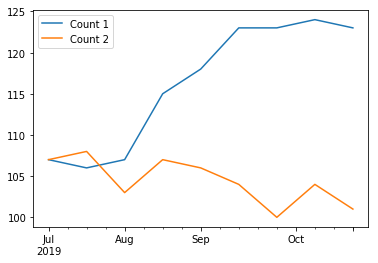

In [8]:
df.plot();

## Replace value

In [12]:
import pandas as pd
import numpy as np

# Read an excel files with headers and footer
col_name = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy = pd.read_excel('data/Energy Indicators.xls'
                       , skiprows = range(18)
                       , skip_footer=38
                       , usecols="C:F"
                       , header= None
                       , names = col_name)
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


In [13]:
# Replace value using Regex, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

energy.Country.replace(regex=[r'\d+', '\(.+\)'], value='', inplace=True)


In [ ]:
# Replace using dictionary
country_list = { "Republic of Korea": "South Korea",
                "United States of America": "United States",
                "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                "China, Hong Kong Special Administrative Region": "Hong Kong"}
energy.Country.replace(country_list, inplace = True)